In [1]:
from omegaconf import OmegaConf
from model import build_stable_diffusion_model
import torch
import torchvision.transforms.functional as F
from torchvision.utils import make_grid


/usr/lib/python3/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


In [2]:
config_path = 'yamls/dreambooth.yaml' # to load the correct model architecture
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
config = OmegaConf.load('yamls/dreambooth.yaml')

model = build_stable_diffusion_model(
    model_name_or_path=config.model.name)

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


In [4]:
checkpoint = torch.load('stable-diffusion-dreambooth-jf15/ckpt/ep7-ba800-rank0.pt')
model.load_state_dict(checkpoint['state']['model'])
model.to(device);

100%|██████████| 50/50 [00:12<00:00,  4.08it/s]


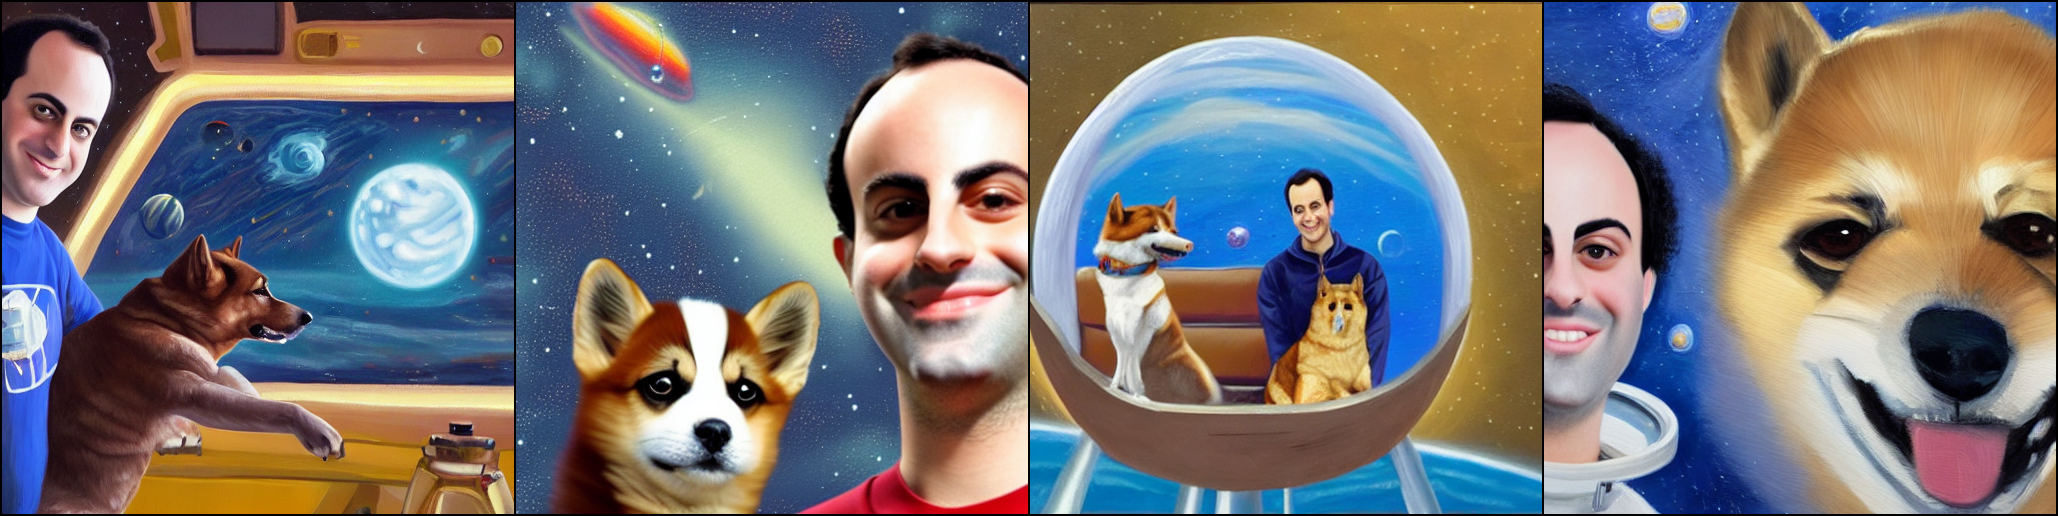

In [5]:
prompt = 'An oil painting of jf and a doge in space on a starship'
out = model.generate(prompt=prompt, num_images_per_prompt=4, seed=1337)
F.to_pil_image(make_grid(out))

100%|██████████| 50/50 [00:11<00:00,  4.20it/s]


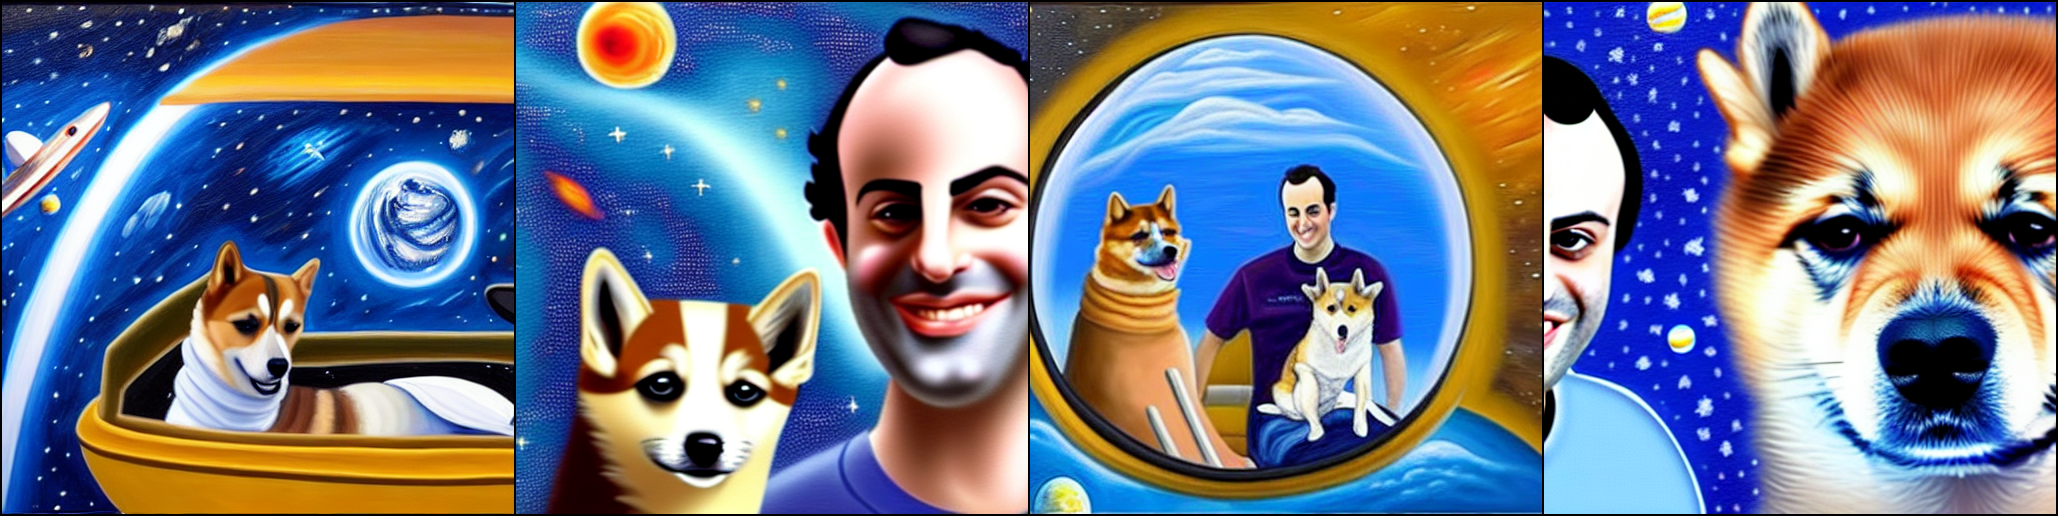

In [8]:
prompt = 'An oil painting of jf and a doge in space on a starship'
out = model.generate(prompt=prompt, num_images_per_prompt=4, seed=1337, guidance_scale=20)
F.to_pil_image(make_grid(out))